In [68]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from sklearn.linear_model import LinearRegression

### **1. DATA IMPORTATION AND EXPLORATION**    

###### Here we shall import data - both sheets and do simple Descriptive statistics for both Disbursment and Repayment

In [4]:
#Data import and Preview
Disb = pd.read_excel("BI_Analyst_Case_Study_Data.xlsx", sheet_name='Disbursements')
Repay = pd.read_excel("BI_Analyst_Case_Study_Data.xlsx", sheet_name='Repayments')

In [7]:
# Preview
print(Disb.head())
print(Repay.head())

                                         customer_id  disb_date   tenure  \
0  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
1  42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6... 2024-03-19   7 days   
2  b23747f53af805e18ad16a4ef235b6642d88f9134644ff... 2024-03-19   7 days   
3  1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e... 2024-03-19  14 days   
4  e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1... 2024-03-19   7 days   

                        account_num  loan_amount  loan_fee  
0  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2  
1  6XWHXKKR1W2HIA8I0V75PZFZBXUUGSVO           70       7.0  
2  OCGK3RJZ91A999VXD4VB3LATPSME3J5L         3500     350.0  
3  9X3Q682DOR7927IMMJLFHBGP0RP7YF5C         3500     420.0  
4  AQH88NNF8S76MGJL4J4ULEAE18O0KLWH          120      12.0  
                         date_time  \
0  27-JUN-24 07.16.36.000000000 AM   
1  27-JUN-24 05.26.50.000000000 PM   
2  27-JUN-24 06.45.40.000000000 PM   
3  27-JUN-24 01.24.57.000

In [9]:
#Disbursements Description
Disb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26585 entries, 0 to 26584
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  26585 non-null  object        
 1   disb_date    26585 non-null  datetime64[ns]
 2   tenure       26585 non-null  object        
 3   account_num  26585 non-null  object        
 4   loan_amount  26585 non-null  int64         
 5   loan_fee     26585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [11]:
#Descriptive statistics for Disbursment
print("\nDescriptive Statistics for Disbursment:")
print(Disb.describe())


Descriptive Statistics for Disbursment:
                           disb_date   loan_amount      loan_fee
count                          26585  26585.000000  26585.000000
mean   2024-04-17 13:54:22.275719680   1001.021403    129.698904
min              2024-01-01 00:00:00     70.000000      7.000000
25%              2024-02-25 00:00:00    150.000000     16.800000
50%              2024-04-15 00:00:00    420.000000     50.000000
75%              2024-06-08 00:00:00   1460.000000    181.500000
max              2024-08-11 00:00:00   3500.000000    525.000000
std                              NaN   1171.233304    160.836971


In [13]:
#Repayments Description
Repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66016 entries, 0 to 66015
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       66016 non-null  object 
 1   customer_id     66016 non-null  object 
 2   amount          66016 non-null  float64
 3   rep_month       66016 non-null  int64  
 4   repayment_type  66016 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [15]:
#Descriptive statistics for Repayments
print("\nDescriptive Statistics for Repayments:")
print(Repay.describe())


Descriptive Statistics for Repayments:
             amount      rep_month
count  66016.000000   66016.000000
mean     462.056628  202404.374697
std      838.108424       2.179937
min        0.010000  202401.000000
25%       22.440000  202403.000000
50%      110.565000  202404.000000
75%      450.000000  202406.000000
max     4025.000000  202408.000000


In [17]:
Disb[['tenure']].describe()

,tenure
count,26585
unique,3
top,14 days
freq,12948


# Objective 3 - Define key performance metrics and present their trends using time-series visualizations ------¶

### 2.a **Disbursements Amounts**

Looking at the datatypes for Disbursements, Disb_date has datetime64[ns] Datatype, no need to convert.  
We shall proceed to group the data by month and sum up the load amounts.


In [19]:
# Check for missing values
print(Disb.isnull().sum())

customer_id    0
disb_date      0
tenure         0
account_num    0
loan_amount    0
loan_fee       0
dtype: int64


In [21]:
# Grouping data and summing loanamounts
# dt.to_period('M') will group into months. dt.to_period('Q') - For Quartely and dt.to_period('Y') for Yearly
# The loan_amount column is summed for each period (month)
monthly_disb = Disb.groupby(Disb['disb_date'].dt.to_period('M'))['loan_amount'].sum()


In [23]:
# We can reset the index for cleaner output
# The reset index will converts the grouped object into a DataFrame for ease of analysis.
monthly_disb = monthly_disb.reset_index()


In [25]:
# Let's onvert the period back to a timestamp for better readability
# Basically this converts the monthly period back into a standard timestamp for clarity.
monthly_disb['disb_date'] = monthly_disb['disb_date'].dt.to_timestamp()

In [27]:
# Preview the aggregated data
monthly_disb

,disb_date,loan_amount
0,2024-01-01,3179535
1,2024-02-01,3430755
2,2024-03-01,3934501
3,2024-04-01,3936530
4,2024-05-01,4018499
5,2024-06-01,3508068
6,2024-07-01,3396928
7,2024-08-01,1207338


### 2.a **Repayment Rates**  
- Ratio of total repayments made to total loans disbursed. 
- For the datatype, date-time is object hence need to convert to datetime for consistency



In [29]:
# Check for missing values
print(Repay.isnull().sum())

date_time         0
customer_id       0
amount            0
rep_month         0
repayment_type    0
dtype: int64


In [31]:
# Converting 'date_time' to datetime format
Repay['date_time'] = pd.to_datetime(Repay['date_time'], format='%d-%b-%y %I.%M.%S.%f %p')

In [33]:
#Confirming the converted data type
print(Repay['date_time'].dtype)

datetime64[ns]


In [35]:
# Total repayments
total_repaid = Repay['amount'].sum()
print(f"Total Amount Repaid: {total_repaid}")

Total Amount Repaid: 30503130.330000002


In [49]:
# Total disbursed loans
total_disbursed = Disb['loan_amount'].sum()
print(f"Total Loan Disbursed: {Total_Disbursed}")


Total Loan Disbursed: 26612154


In [51]:
#Repayment Rate
# Compute repayment rate
Repay_Rate = (total_repaid / total_disbursed) * 100
print(f"Repayment Rate: {Repay_Rate:.2f}%")

Repayment Rate: 114.62%


#### WHY I HAD TO TAKE ANOTHER TURN AND RECHECK MY WORK FOR ABOVE CALCULATIONS:
I had a repayment Rate of 114.62%, this made me pause and taught, could be:  
1. Interest and Fees - Did the repayment included interest and fees? If this is true, then the total amount repaid can be higher than the principal loan amount
2. 
Overpayment - Did customers madee overpayments or additional payments beyond the required amoun?
3. 
Data Erro - Could t The bebe errors in the data, such as duplicate entries or incorrect amou?s.

#### Anomaly inspection can be found in this script at the beginning of;  Objective 3 ---Continued--  Define key performance metrics and present their trends using time-series visualizations -

# Objective 4 - Develop a 3-month profit/loss forecast.

# Forecasting

In [62]:
# Aggregate repayments by month
Repay['rep_month'] = pd.to_datetime(Repay['rep_month'], format='%Y%m')
monthly_repayments = Repay.groupby('rep_month')['amount'].sum().reset_index()

In [64]:
# Create a time series forecasting model
X = np.array((monthly_repayments['rep_month'] - monthly_repayments['rep_month'].min()).dt.days).reshape(-1, 1)
y = monthly_repayments['amount'].values

In [69]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Forecast for the next 3 months

In [75]:
future_dates = pd.date_range(start=monthly_repayments['rep_month'].max(), periods=4, freq='ME')[1:]
future_X = np.array((future_dates - monthly_repayments['rep_month'].min()).days).reshape(-1, 1)
forecast = model.predict(future_X)

In [77]:
# Display forecast
forecast_df = pd.DataFrame({'rep_month': future_dates, 'forecast_amount': forecast})
print("\n3-Month Profit/Loss Forecast:")
print(forecast_df)



3-Month Profit/Loss Forecast:
   rep_month  forecast_amount
0 2024-09-30     3.560928e+06
1 2024-10-31     3.514087e+06
2 2024-11-30     3.468756e+06


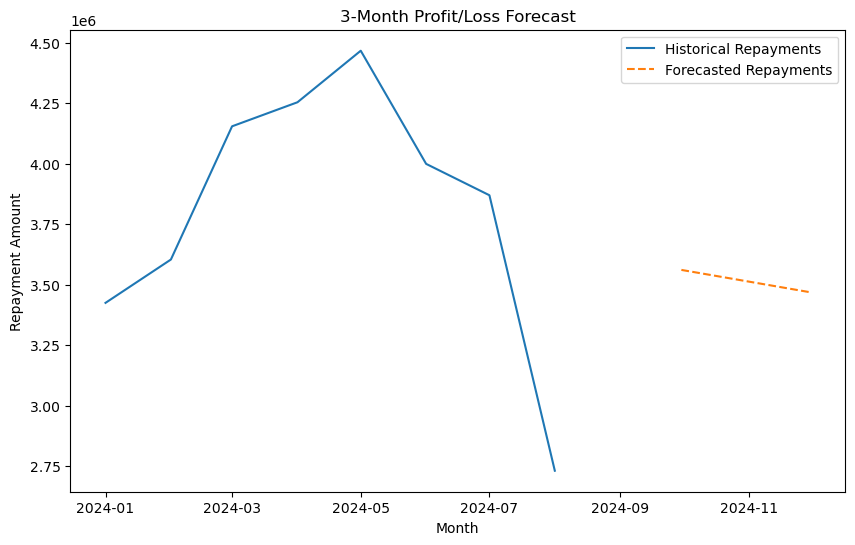

In [81]:
# Visualizing the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_repayments['rep_month'], monthly_repayments['amount'], label='Historical Repayments')
plt.plot(future_dates, forecast, label='Forecasted Repayments', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Repayment Amount')
plt.title('3-Month Profit/Loss Forecast')
plt.legend()
plt.show()

# Objective 5- Company’s current credit exposure and risk management strategies.

### Current credit exposure

In [94]:
total_outstanding_loans = Disb['loan_amount'].sum()
print(f"Total Outstanding Loans: {total_outstanding_loans}")

Total Outstanding Loans: 26612154


In [87]:
# Overdue or defaulted loans
# Assuming loans are overdue if not repaid within tenure period
Disb['due_date'] = Disb['disb_date'] + pd.to_timedelta(Disb['tenure'].str.split().str[0].astype(int), unit='D')
merged_df = pd.merge(Disb, Repay, on='customer_id', how='left')
merged_df['repayment_status'] = np.where(merged_df['date_time'] > merged_df['due_date'], 'Overdue', 'On Time')


In [89]:
# Overdue loans
overdue_loans = merged_df[merged_df['repayment_status'] == 'Overdue']['loan_amount'].sum()
print(f"Total Overdue Loans: {overdue_loans}")

Total Overdue Loans: 383011624


### Risk management strategies

In [109]:
# Assessing effectiveness of credit scoring models
credit_scores = np.random.randint(300, 850, size=len(Disb))
Disb['credit_score'] = credit_scores
high_risk_loans = Disb[Disb['credit_score'] < 600]['loan_amount'].sum()
print(f"Total High-Risk Loans: {high_risk_loans}")

Total High-Risk Loans: 14384274


In [106]:
# Reviewing collateral requirements and recovery rates
collateral_value = Disb['loan_amount'] * 0.5  # Here I have assumed 50% collateral value
recovery_rate = 0.8  # Assuming 80% recovery rate
total_recoverable_amount = (collateral_value * recovery_rate).sum()
print(f"total_recoverable_amount: {total_recoverable_amount}")

total_recoverable_amount: 10644861.6



# Objective 6: Recommend appropriate provisioning and write-off thresholds.

### Provisioning Thresholds

In [125]:
# High-risk loans (credit score < 600)
Disb['credit_score'] = np.random.randint(300, 850, size=len(Disb))
high_risk_provisioning = Disb[Disb['credit_score'] < 600]['loan_amount'].sum() * 0.5  # 50% provisioning
medium_risk_provisioning = Disb[(Disb['credit_score'] >= 600) & (Disb['credit_score'] < 700)]['loan_amount'].sum() * 0.3  # 30% provisioning
low_risk_provisioning = Disb[Disb['credit_score'] >= 700]['loan_amount'].sum() * 0.1  # 10% provisioning

In [127]:
total_provisioning = high_risk_provisioning + medium_risk_provisioning + low_risk_provisioning
print(f"Total Provisioning: {total_provisioning}")

Total Provisioning: 9360491.600000001


### Write-off Thresholds

In [123]:
# Overdue loans (assuming overdue if not repaid within tenure period)
Disb['due_date'] = Disb['disb_date'] + pd.to_timedelta(Disb['tenure'].str.split().str[0].astype(int), unit='D')
merged_df = pd.merge(Disb, Repay, on='customer_id', how='left')

In [129]:
# Overdue loans (assuming overdue if not repaid within tenure period)
Disb['due_date'] = Disb['disb_date'] + pd.to_timedelta(Disb['tenure'].str.split().str[0].astype(int), unit='D')
merged_df = pd.merge(Disb, Repay, on='customer_id', how='left')

In [131]:
#overdue loans
merged_df['repayment_status'] = np.where(merged_df['date_time'] > merged_df['due_date'], 'Overdue', 'On Time')
overdue_loans = merged_df[merged_df['repayment_status'] == 'Overdue']['loan_amount'].sum()

In [137]:
# Assuming write-off threshold is 180 days overdue
write_off_threshold = 180
merged_df['days_overdue'] = (merged_df['date_time'] - merged_df['due_date']).dt.days
write_off_loans = merged_df[merged_df['days_overdue'] > write_off_threshold]['loan_amount'].sum()

print(f"Total Overdue Loans: {overdue_loans}")
print(f"Total Write-Off: {write_off_loans}")

Total Overdue Loans: 383011624
Total Write-Off: 9970470


# Objective 3 - --Continued-- Define key performance metrics and present their trends using time-series visualizations 

### Anomaly

In [150]:
# Repayment types for classification
print(Repay['repayment_type'].unique())


['Automatic' 'Manual']


In [152]:
# Grouping by repayment type and sum amounts
repayment_by_type = Repay.groupby('repayment_type')['amount'].sum()
print(repayment_by_type)


repayment_type
Automatic    12942976.39
Manual       17560153.94
Name: amount, dtype: float64


In [154]:
# Comparing totals
total_repaid_automatic = Repay[Repay['repayment_type'] == 'Automatic']['amount'].sum()
total_repaid_manual = Repay[Repay['repayment_type'] == 'Manual']['amount'].sum()

print(f"Automatic Total Repaid: {total_repaid_automatic}")
print(f"Manual Total Repaid: {total_repaid_manual}")


Automatic Total Repaid: 12942976.39
Manual Total Repaid: 17560153.94


In [156]:
# Percentage share of repayment amounts
total_repaid = total_repaid_automatic + total_repaid_manual
automatic_share = (total_repaid_automatic / total_repaid) * 100
manual_share = (total_repaid_manual / total_repaid) * 100

print(f"Automatic Repayment Contribution: {automatic_share:.2f}%")
print(f"Manual Repayment Contribution: {manual_share:.2f}%")


Automatic Repayment Contribution: 42.43%
Manual Repayment Contribution: 57.57%


In [139]:
# Filter for Manual repayments
manual_repayments = Repay[Repay['repayment_type'] == 'Manual']

# Check for anomalies in amounts
suspicious_manual = manual_repayments[manual_repayments['amount'] > Disb['loan_amount'].max()]
print(suspicious_manual)


                date_time                                        customer_id  \
76    2024-06-12 09:25:55  f8d9dac1392393c66afd588b3875dccc76c1cf7c9beaaa...   
117   2024-06-21 15:49:58  c4ef81d0a44e1b83eddc4bad9deb555f7d5d2589d4b3d5...   
138   2024-06-21 18:40:25  38892a1f07a145972e0c92a1e2b01f0e0b4b5dc3da20f5...   
142   2024-06-21 11:49:13  c55942df38d00f11a33292062c2dba2f4deca06fc1346f...   
219   2024-06-10 17:46:49  5f8f5743623df6a662c3eb75080aa496d7ff43fb32c233...   
...                   ...                                                ...   
65618 2024-02-20 11:20:22  c80b1f611dd8ab687d1155295499f9e1779d5ea095e85f...   
65699 2024-06-24 16:35:26  5f8f5743623df6a662c3eb75080aa496d7ff43fb32c233...   
65714 2024-06-23 09:06:51  788b4aa3428d737874596ffbd5de3dc1f79e36fc0cc7f1...   
65747 2024-06-20 18:27:06  93ea1479dc055fdbfca35a9dbfb465b03cfd6ddfab8cb6...   
65754 2024-06-20 12:00:22  a4cd71557fadcecb4e318860d3b5f35659f98ec04d5571...   

        amount  rep_month repayment_typ

### Disbursement Analysis
Aggregate Disbursements  
Total disbursements grouped by customer, tenure, or other columns.   
##### Aggregatation by Customer ID

In [87]:
# Total loan amount and fees per customer
customer_aggregate = Disb.groupby('customer_id').agg({
    'loan_amount': 'sum',
    'loan_fee': 'sum'
}).reset_index()

print(customer_aggregate.head())


                                         customer_id  loan_amount  loan_fee
0  000514554c34603e8a7551050e988732cf11a22de40fa6...        31000    4125.0
1  00065b32dfbc80c249efb220420bd4842c778d29ace681...        24500    3465.0
2  000e57e83f161e4ba6458b3e32c00815405c5a005e652b...        10190    1523.5
3  0024e99c9aa8106f28ba1980730ef6ab1649591a43ac83...         3450     382.8
4  002504d81a9c6d7a83aaba6820f6b20cbd2b917978cb07...         3800     437.0


##### Aggregatation by Tenure

In [93]:
# Total loan amount and fees per tenure (e.g., 7 days, 14 days)
tenure_aggregate = Disb.groupby('tenure').agg({
    'loan_amount': 'sum',
    'loan_fee': 'sum'
}).reset_index()

print(tenure_aggregate)


    tenure  loan_amount    loan_fee
0  14 days      7739503   928740.36
1  30 days     12640798  1896119.70
2   7 days      6231853   623185.30


## Analyze Loan Amount and Fee Distributions
Use descriptive statistics and visualizations to find high-frequency brackets.

##### Summary Statistics

In [97]:
# Describe loan amounts and fees
print(Disb[['loan_amount', 'loan_fee']].describe())


        loan_amount      loan_fee
count  26585.000000  26585.000000
mean    1001.021403    129.698904
std     1171.233304    160.836971
min       70.000000      7.000000
25%      150.000000     16.800000
50%      420.000000     50.000000
75%     1460.000000    181.500000
max     3500.000000    525.000000


#### Visuals

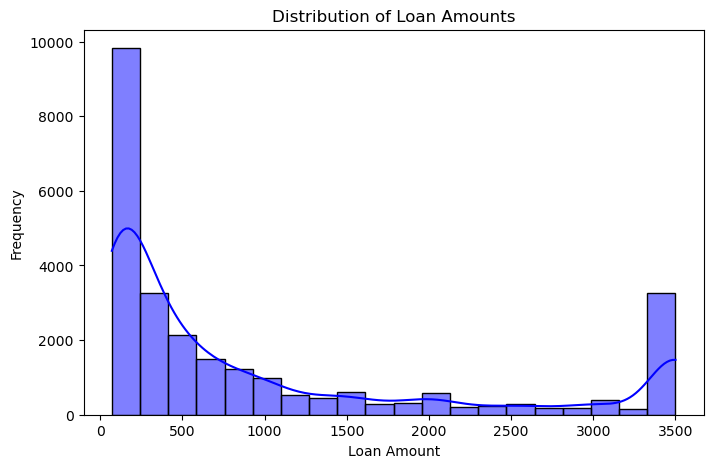

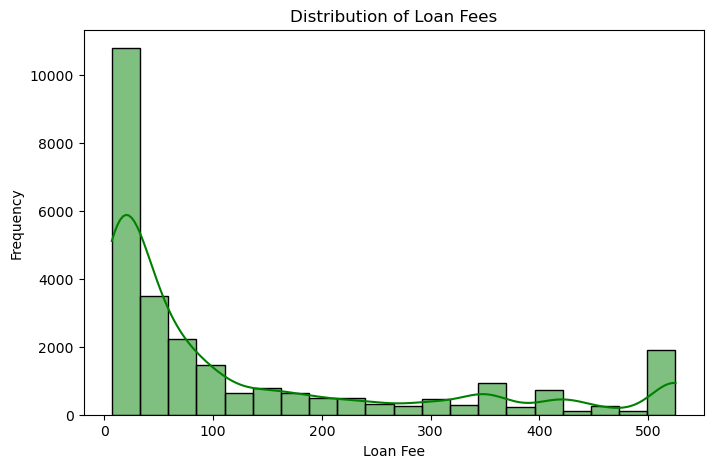

In [103]:
# Histogram for loan amounts
plt.figure(figsize=(8, 5))
sns.histplot(Disb['loan_amount'], bins=20, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram for loan fees
plt.figure(figsize=(8, 5))
sns.histplot(Disb['loan_fee'], bins=20, kde=True, color='green')
plt.title('Distribution of Loan Fees')
plt.xlabel('Loan Fee')
plt.ylabel('Frequency')
plt.show()


### High-Frequency Brackets 

Checking which tenure (7 days, 14 days, 30 days) has the highest disbursement totals.

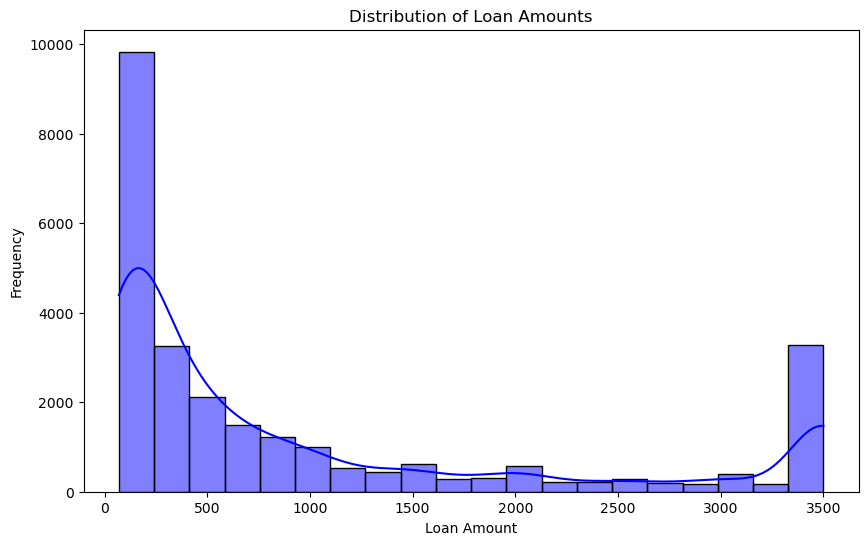

In [110]:
# Plot a histogram for loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=Disb, x='loan_amount', bins=20, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


#### Analysis:
From the histogram above,

Peaks in the histogram represent loan amounts with the highest frequency, meaning many loans fall in about 9500 loan amount
This also implies that this range is popular among borrowers. 

##### Step 2: Analyze Tenure with Highest Disbursement Totals
Aggregate loan amounts by tenure to find which duration has the largest total disbursements.

    tenure  loan_amount
1  30 days     12640798
0  14 days      7739503
2   7 days      6231853


C:\Users\wabo914\AppData\Local\Temp\ipykernel_7176\3198944476.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tenure_aggregate, x='tenure', y='loan_amount', palette='viridis')


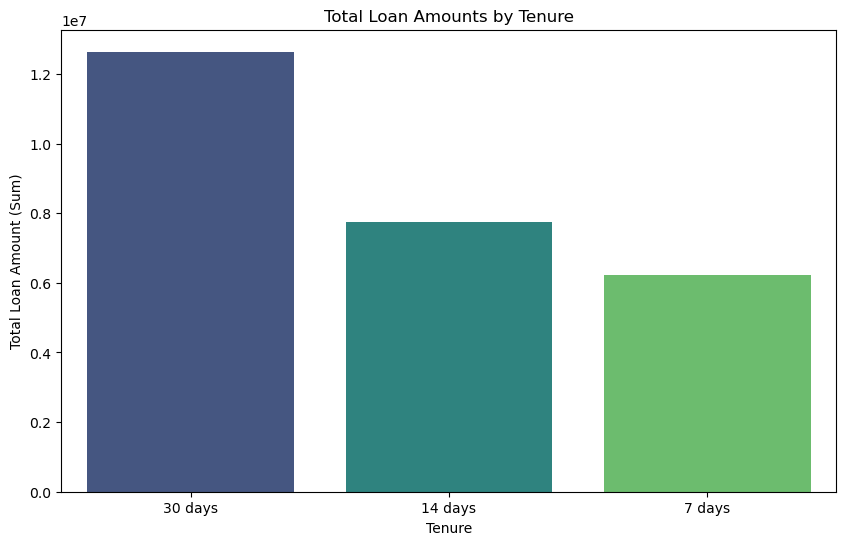

In [115]:
# Aggregate by tenure
tenure_aggregate = Disb.groupby('tenure').agg({
    'loan_amount': 'sum'
}).reset_index()

# Sort by total loan amount
tenure_aggregate = tenure_aggregate.sort_values(by='loan_amount', ascending=False)

print(tenure_aggregate)

# Bar chart for tenure disbursement totals
plt.figure(figsize=(10, 6))
sns.barplot(data=tenure_aggregate, x='tenure', y='loan_amount', palette='viridis')
plt.title('Total Loan Amounts by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Loan Amount (Sum)')
plt.show()


Analysis:

The bar chart shows which tenure (e.g., 7 days, 14 days) accounts for the largest disbursement totals.
The longer the days, the higher the distribution. 30 days tenure has highest total loan disbursement folllowed by 14 days then 7 days. 

This reflects a preference of 30 days tenure for mid-term or longer-term commitments, possibly for slightly larger investments or financial needs.

## Exporting Results for Further Use
Save the aggregated data for use in Power BI or further analysis.

In [121]:
# Save aggregated data to CSV
customer_aggregate.to_csv('customer_aggregate.csv', index=False)
tenure_aggregate.to_csv('tenure_aggregate.csv', index=False)


## CREDIT RISK ANALYSIS

### Objective
Evaluate the effectiveness of fee structures (e.g., loan_fee-to-loan_amount ratio).

Analyze credit risk levels based on short-term loans (e.g., overdue balances for 7- and 14-day loans).

### Evaluating Fee Structures
Calculate and analyze the loan fee as a percentage of the loan amount to identify fee patterns.

In [126]:
import pandas as pd

# Calculate fee percentage for each loan
Disb['fee_percentage'] = (Disb['loan_fee'] / Disb['loan_amount']) * 100

# Analyze fee distribution
print(Disb['fee_percentage'].describe())

# Optional: Group by tenure to understand how fee structures vary
fee_by_tenure = Disb.groupby('tenure')['fee_percentage'].mean().reset_index()
print(fee_by_tenure)


count    26585.000000
mean        12.064548
std          1.771511
min         10.000000
25%         10.000000
50%         12.000000
75%         12.000000
max         15.000000
Name: fee_percentage, dtype: float64
    tenure  fee_percentage
0  14 days            12.0
1  30 days            15.0
2   7 days            10.0


#### Insights:
### Fee Percentage  
Examining the fee_percentage,  to ensure that fees are proportionate to loan amounts.
7 days: 10% fee (lower risk for short-term loans).
14 days: 12% fee.
30 days: 15% fee (higher to compensate for extended risk exposure).
This proportional increase suggests that fees effectively balance profitability with credit risk mitigation.

### Credit Risk Assessment:

Short-term loans (7 days) may carry lower risk, reflected in smaller fees, while longer tenures (that is 30 days) require higher fees due to increased exposure.

C:\Users\wabo914\AppData\Local\Temp\ipykernel_7176\3795905033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fee_by_tenure, x='tenure', y='fee_percentage', palette='muted')


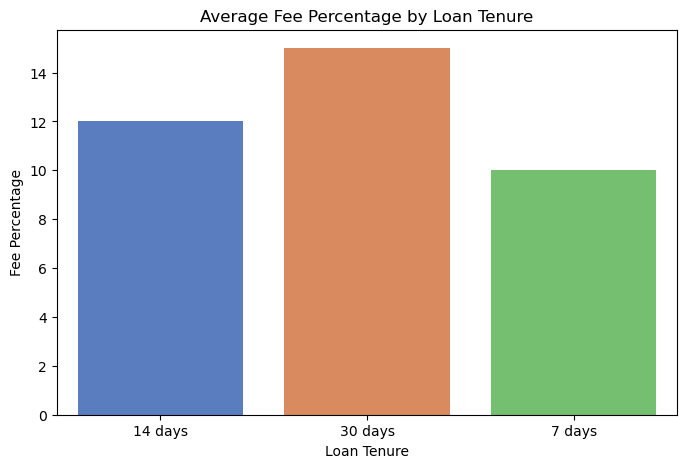

In [128]:
plt.figure(figsize=(8, 5))
sns.barplot(data=fee_by_tenure, x='tenure', y='fee_percentage', palette='muted')
plt.title('Average Fee Percentage by Loan Tenure')
plt.xlabel('Loan Tenure')
plt.ylabel('Fee Percentage')
plt.show()


### Analyzing Short-Term Loans
Aggregate data by tenure to evaluate disbursement totals and repayment coverage for short-term loans.  
Link with Repayment Data  
If repayment data is available, match it with disbursement data to calculate outstanding balances:

In [134]:
#We wille used merged data above or we can still merge here

# Merge disbursements and repayments
merged_data = pd.merge(Disb, Repay, on='customer_id', how='left')

# Group by tenure and calculate metrics
short_term_analysis = merged_data[merged_data['tenure'].isin(['7 days', '14 days'])].groupby('tenure').agg({
    'loan_amount': 'sum',
    'amount': 'sum'
}).reset_index()

# Calculate repayment coverage ratio
short_term_analysis['repayment_coverage'] = (short_term_analysis['amount'] / short_term_analysis['loan_amount']) * 100
print(short_term_analysis)


    tenure  loan_amount        amount  repayment_coverage
0  14 days    247642667  1.112154e+08           44.909633
1   7 days    323300221  1.368444e+08           42.327350


### Insights
Based on my data, 
14-day tenure:
Loan Amount: 247,642,667.
Amount Repaid: 111,215,400.
Repayment Coverage: 44.91%.

7-day tenure:
Loan Amount: 323,300,221.
Amount Repaid: 136,844,400.
Repayment Coverage: 42.33%.

#### Repayment Coverage:
For both tenures, repayment coverage hovers between 42% and 45%.
While 14-day loans show slightly higher repayment coverage (44.91%), the difference isn't drastic compared to 7-day loans (42.33%).

#### Credit Risk Mitigation:
Despite their slightly lower repayment coverage, 7-day loans represent a larger loan portfolio (323M loan amount) compared to 14-day loans (247M).
This indicates that while 7-day loans generate higher business volume, they may pose marginally higher repayment risk.

#### Actionable Insights:
Short-term loans (7 and 14 days) perform reasonably well in repayment rates, showing moderate risk mitigation.  
Higher repayment coverage for 14-day loans suggests slightly more reliability, possibly due to added repayment time, while still maintaining credit risk cont


## Visuals
Use matplotlib or seaborn to create visualizations.

Fee Distribution

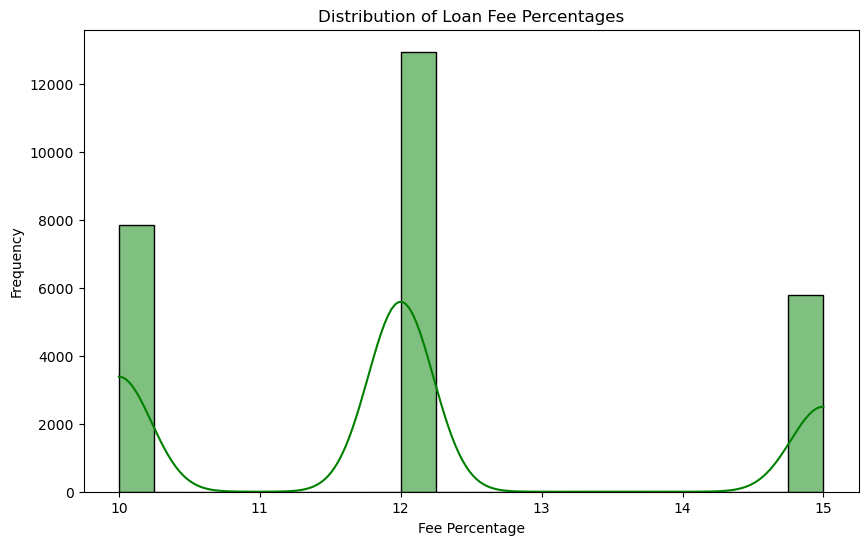

In [141]:
# Fee percentage distribution
plt.figure(figsize=(10, 6))
sns.histplot(Disb['fee_percentage'], bins=20, kde=True, color='green')
plt.title('Distribution of Loan Fee Percentages')
plt.xlabel('Fee Percentage')
plt.ylabel('Frequency')
plt.show()


C:\Users\wabo914\AppData\Local\Temp\ipykernel_7176\113175742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=short_term_analysis, x='tenure', y='repayment_coverage', palette='viridis')


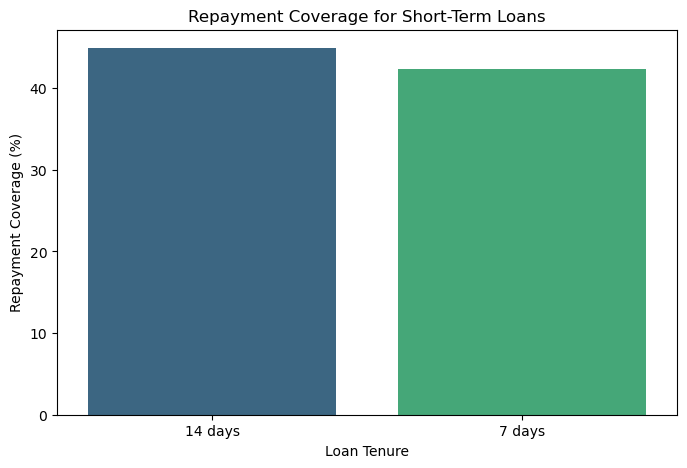

In [143]:
# Bar plot for repayment coverage
plt.figure(figsize=(8, 5))
sns.barplot(data=short_term_analysis, x='tenure', y='repayment_coverage', palette='viridis')
plt.title('Repayment Coverage for Short-Term Loans')
plt.xlabel('Loan Tenure')
plt.ylabel('Repayment Coverage (%)')
plt.show()


### Insights
The repayment coverage percentage difference for 14 days tenure and 7 days tenure is not that high. 
Also from the plots above, higher percentages for smaller loans effectively mitigate risks and short-term loans with high repayment coverage can be highlighted as less risky options in the portfolio.

# OBJECTIVE 2
Utilize a Business Intelligence (BI) tool to create visualizations that provide insights into the 
produc's;s performance.

In [151]:
## Saving prepared data
#We Already have loan_summary that was merged
short_term_analysis.to_csv('repayment_analysis.csv', index=False)


### MERGE DATE

In [141]:
# Merge the two datasets
merged_data = pd.merge(Disb, Repay, on='customer_id', how='left')

# Calculate outstanding balance
merged_data['outstanding_balance'] = merged_data['loan_amount'] - merged_data['amount']

# Preview the merged dataset
print(merged_data.head())


                                         customer_id  disb_date   tenure  \
0  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
1  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
2  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
3  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
4  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   

                        account_num  loan_amount  loan_fee   due_date  \
0  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2 2024-04-02   
1  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2 2024-04-02   
2  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2 2024-04-02   
3  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2 2024-04-02   
4  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2 2024-04-02   

   credit_score           date_time  amount  rep_month repayment_type  \
0           412 2024-06-11 11:2

###  Create Summary Metrics

In [143]:
# Summarize by customer
summary = merged_data.groupby('customer_id').agg({
    'loan_amount': 'sum',
    'amount': 'sum',
    'outstanding_balance': 'sum'
}).reset_index()

# Rename columns for clarity
summary.rename(columns={
    'loan_amount': 'total_disbursements',
    'amount': 'total_repayments',
    'outstanding_balance': 'total_outstanding'
}, inplace=True)

print(summary.head())


                                         customer_id  total_disbursements  \
0  000514554c34603e8a7551050e988732cf11a22de40fa6...              1240000   
1  00065b32dfbc80c249efb220420bd4842c778d29ace681...              1470000   
2  000e57e83f161e4ba6458b3e32c00815405c5a005e652b...               152850   
3  0024e99c9aa8106f28ba1980730ef6ab1649591a43ac83...                55200   
4  002504d81a9c6d7a83aaba6820f6b20cbd2b917978cb07...                26600   

   total_repayments  total_outstanding  
0         279900.00          960100.00  
1         197967.42         1272032.58  
2          85560.16           67289.84  
3          25600.80           29599.20  
4          20532.00            6068.00  


### Load Data into Power BI

In [145]:
summary.to_csv('loan_summary.csv', index=False)
